# MNIST Digit Classification Project
## Overview
This project implements three different models to classify handwritten digits from the MNIST dataset:
- Random Forest Classifier (RF)
- Feed-Forward Neural Network (FFNN)
- Convolutional Neural Network (CNN)

All models follow a common interface pattern and are accessed through a unified `MnistClassifier` class.

## Project Structure
1. Interface and Model Definitions
2. Data Loading and Preprocessing
3. Model Training and Evaluation
4. Performance Analysis
5. Edge Cases Testing
6. Visual Results and Comparisons

## Requirements
This notebook requires the following libraries:

In [23]:
# Core Scientific Libraries
import numpy as np                   # NumPy: For efficient numerical operations, array manipulations, and mathematical computations
import tensorflow as tf              # TensorFlow: Core library for building and training neural networks

# Data Visualization Libraries
import matplotlib.pyplot as plt      # Matplotlib: Basic plotting library for creating static visualizations
import seaborn as sns               # Seaborn: Statistical data visualization based on matplotlib, provides prettier plots

# Object-Oriented Programming Tools
from abc import ABC, abstractmethod  # For creating abstract base classes and interfaces in Python

# Machine Learning Libraries
from sklearn.ensemble import RandomForestClassifier  # Scikit-learn's implementation of Random Forest algorithm
from tensorflow import keras         # Keras: High-level neural network API, makes building neural networks easier
from tensorflow.keras import layers  # Neural network building blocks (Dense, Conv2D, MaxPooling2D, etc.)

# Metrics and Evaluation Tools
from sklearn.metrics import confusion_matrix, classification_report  # For model evaluation and performance metrics

# Utility Libraries
import time                         # For measuring execution time and model training duration

### Library Purposes:

1. **Data Processing and Computation**
   - `numpy`: The foundation for numerical computing in Python
   - Used for: array operations, matrix manipulations, mathematical functions

2. **Deep Learning Framework**
   - `tensorflow` and `keras`: Modern deep learning libraries
   - Used for: building and training neural networks (FFNN and CNN)

3. **Visualization**
   - `matplotlib`: Basic plotting library
   - `seaborn`: Enhanced statistical visualizations
   - Used for: plotting accuracies, confusion matrices, sample images

4. **Machine Learning Tools**
   - `sklearn.ensemble`: Contains traditional ML algorithms
   - Used for: Random Forest implementation, performance metrics

5. **Programming Utilities**
   - `abc`: For implementing the interface design pattern
   - `time`: For performance benchmarking

This combination of libraries provides all the tools needed for data preprocessing, model building, training, evaluation, and visualization in our MNIST classification project.

## 1. Interface and Model Definitions
### MnistClassifierInterface
This abstract base class defines the common interface that all our models will implement:
- `train(X_train, y_train)`: Trains the model on given data
- `predict(X_test)`: Makes predictions on new data

In [24]:
class MnistClassifierInterface(ABC):
    """
    Interface that defines the required methods for all MNIST classifiers.
    
    Every model (Random Forest, FFNN, CNN) must implement these methods:
    - train: For training the model on data
    - predict: For making predictions on new data
    """
    
    @abstractmethod
    def train(self, X_train, y_train):
        """
        Train the model on the given data.
        
        Args:
            X_train: Training data (images)
            y_train: Training labels
        """
        pass

    @abstractmethod
    def predict(self, X_test):
        """
        Make predictions on new data.
        
        Args:
            X_test: Test data (images)
            
        Returns:
            array: Predicted labels
        """
        pass

### Random Forest Model
This model:
- Flattens 28x28 images into 784-dimensional vectors
- Uses scikit-learn's RandomForestClassifier
- Features 100 decision trees
- Optimized for MNIST classification

In [25]:
class RandomForestModel(MnistClassifierInterface):
    """
    Random Forest implementation for MNIST classification.
    
    This model flattens the 28x28 images into 784-dimensional vectors
    and uses scikit-learn's RandomForestClassifier.
    """
    
    def __init__(self):
        """
        Initialize Random Forest model with 100 trees and fixed random state
        for reproducibility.
        """
        self.model = RandomForestClassifier(
            n_estimators=100,  # Number of trees
            random_state=42    # For reproducible results
        )

    def train(self, X_train, y_train):
        """
        Train the Random Forest model.
        
        Args:
            X_train: Training images (will be flattened to 2D)
            y_train: Training labels
        """
        # Random Forest expects 2D input (samples × features)
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        """
        Make predictions using the trained model.
        
        Args:
            X_test: Test images (will be flattened to 2D)
            
        Returns:
            array: Predicted digit labels
        """
        return self.model.predict(X_test)

### Feed-Forward Neural Network Model
Architecture:
- Input layer (784 neurons)
- Hidden layer (128 neurons, ReLU)
- Dropout (0.2)
- Hidden layer (64 neurons, ReLU)
- Dropout (0.2)
- Output layer (10 neurons, softmax)

In [26]:
class FFNNModel(MnistClassifierInterface):
    """
    Feed-Forward Neural Network implementation for MNIST classification.
    
    Architecture:
    - Input layer (784 neurons)
    - Hidden layer (128 neurons, ReLU)
    - Dropout (0.2)
    - Hidden layer (64 neurons, ReLU)
    - Dropout (0.2)
    - Output layer (10 neurons, softmax)
    """
    
    def __init__(self):
        """
        Initialize the FFNN model architecture using Keras Sequential API.
        """
        self.model = keras.Sequential([
            layers.Input(shape=(784,)),  # Flattened input
            layers.Dense(128, activation='relu'),
            layers.Dropout(0.2),  # Prevent overfitting
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')  # 10 digits output
        ])
        
        # Compile model with Adam optimizer and categorical crossentropy loss
        self.model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train):
        """
        Train the FFNN model.
        
        Args:
            X_train: Training images (should be flattened to 784 dimensions)
            y_train: Training labels (should be one-hot encoded)
        """
        self.model.fit(
            X_train, 
            y_train,
            epochs=5,
            batch_size=64,
            validation_split=0.1
        )

    def predict(self, X_test):
        """
        Make predictions using the trained model.
        
        Args:
            X_test: Test images (should be flattened to 784 dimensions)
            
        Returns:
            array: Predicted digit labels
        """
        return self.model.predict(X_test).argmax(axis=1)

### Convolutional Neural Network Model
Architecture:
- Input layer (28×28×1)
- Conv2D (32 filters) + ReLU
- MaxPooling
- Conv2D (64 filters) + ReLU
- MaxPooling
- Dense layers

In [27]:
class CNNModel(MnistClassifierInterface):
    """
    Convolutional Neural Network implementation for MNIST classification.
    
    Architecture:
    - Input layer (28×28×1)
    - Conv2D (32 filters) + ReLU
    - MaxPooling
    - Conv2D (64 filters) + ReLU
    - MaxPooling
    - Flatten
    - Dense (64 neurons) + ReLU
    - Dropout (0.2)
    - Output (10 neurons + softmax)
    """
    
    def __init__(self):
        """
        Initialize the CNN model architecture using Keras Sequential API.
        """
        self.model = keras.Sequential([
            # Input layer expects 28×28 grayscale images
            layers.Input(shape=(28, 28, 1)),
            
            # First convolutional block
            layers.Conv2D(32, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            
            # Second convolutional block
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            
            # Flatten and dense layers
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(10, activation='softmax')
        ])
        
        # Compile model
        self.model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

    def train(self, X_train, y_train):
        """
        Train the CNN model.
        
        Args:
            X_train: Training images (should be shaped as (samples, 28, 28, 1))
            y_train: Training labels (should be one-hot encoded)
        """
        self.model.fit(
            X_train, 
            y_train,
            epochs=5,
            batch_size=64,
            validation_split=0.1
        )

    def predict(self, X_test):
        """
        Make predictions using the trained model.
        
        Args:
            X_test: Test images (should be shaped as (samples, 28, 28, 1))
            
        Returns:
            array: Predicted digit labels
        """
        return self.model.predict(X_test).argmax(axis=1)

## Unified Model Interface Implementation

### MnistClassifier: Factory Pattern Design
The `MnistClassifier` class serves as a unified interface (factory pattern) for all our MNIST classification models. This design pattern provides several benefits:

1. **Abstraction**: Users don't need to know the internal details of each model
2. **Consistency**: All models are accessed and used in the same way
3. **Flexibility**: Easy to add new models without changing client code

### Usage Example:
```python
# Initialize any model using the same interface
rf_model = MnistClassifier(algorithm='rf')  # Random Forest
nn_model = MnistClassifier(algorithm='nn')  # Neural Network
cnn_model = MnistClassifier(algorithm='cnn')  # CNN

# Train and predict using identical methods
rf_model.train(X_train, y_train)
predictions = rf_model.predict(X_test)

In [28]:
class MnistClassifier:
    """
    Main classifier class that provides a unified interface to all models.
    
    This class takes an algorithm name as input and instantiates the appropriate model.
    Available algorithms:
    - 'rf': Random Forest
    - 'nn': Feed-Forward Neural Network
    - 'cnn': Convolutional Neural Network
    """
    
    def __init__(self, algorithm):
        """
        Initialize the selected model.
        
        Args:
            algorithm (str): One of 'rf', 'nn', or 'cnn'
        
        Raises:
            ValueError: If algorithm is not one of the supported types
        """
        if algorithm == 'rf':
            self.model = RandomForestModel()
        elif algorithm == 'nn':
            self.model = FFNNModel()
        elif algorithm == 'cnn':
            self.model = CNNModel()
        else:
            raise ValueError("Invalid algorithm. Choose from 'rf', 'nn', or 'cnn'.")

    def train(self, X_train, y_train):
        """
        Train the selected model.
        
        Args:
            X_train: Training data
            y_train: Training labels
        """
        self.model.train(X_train, y_train)

    def predict(self, X_test):
        """
        Make predictions using the selected model.
        
        Args:
            X_test: Test data
            
        Returns:
            array: Predicted labels
        """
        return self.model.predict(X_test)

## 2. Data Loading and Preprocessing
Loading the MNIST dataset from Keras and preparing it for our models:
- 60,000 training images
- 10,000 test images
- Each image is 28x28 pixels (grayscale)
- Pixel values normalized to [0,1]

In [29]:
"""
Load and preprocess the MNIST dataset.
The dataset contains 28×28 grayscale images of handwritten digits (0-9).
"""

# Load MNIST dataset from keras
from tensorflow.keras.datasets import mnist

# Load and split the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Data shapes:")
print(f"X_train: {X_train.shape}")  # Should be (60000, 28, 28)
print(f"X_test: {X_test.shape}")    # Should be (10000, 28, 28)
print(f"y_train: {y_train.shape}")  # Should be (60000,)
print(f"y_test: {y_test.shape}")    # Should be (10000,)

Data shapes:
X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


## Data Exploration
Visualize some sample images from our dataset to understand what we're working with:

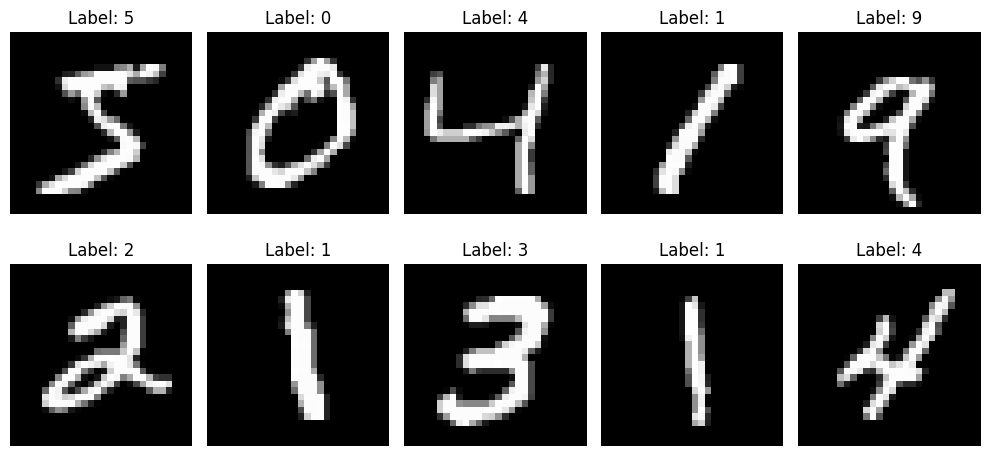

In [30]:
# Plot some sample digits
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Model Training and Evaluation
We'll train each model and evaluate its performance:
- Random Forest (RF)
- Feed-Forward Neural Network (NN)
- Convolutional Neural Network (CNN)

Each model will be trained with the same data splits for fair comparison.

In [31]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

def train_and_evaluate_model(algorithm, X_train, y_train, X_test, y_test):
    """
    Train a model and evaluate its performance.
    
    Args:
        algorithm (str): One of 'rf', 'nn', or 'cnn'
        X_train, y_train: Training data
        X_test, y_test: Test data
    
    Returns:
        tuple: (accuracy, predictions)
    """
    # Initialize the classifier
    clf = MnistClassifier(algorithm=algorithm)
    
    # Prepare data based on algorithm type
    if algorithm == 'rf':
        # Flatten images for Random Forest
        X_train_prep = X_train.reshape(X_train.shape[0], -1)
        X_test_prep = X_test.reshape(X_test.shape[0], -1)
        y_train_prep = y_train
        y_test_prep = y_test
    else:
        # Prepare data for neural networks
        if algorithm == 'cnn':
            # Add channel dimension for CNN
            X_train_prep = X_train.reshape(-1, 28, 28, 1)
            X_test_prep = X_test.reshape(-1, 28, 28, 1)
        else:  # FFNN
            # Flatten images for FFNN
            X_train_prep = X_train.reshape(-1, 784)
            X_test_prep = X_test.reshape(-1, 784)
        
        # One-hot encode labels for neural networks
        y_train_prep = to_categorical(y_train, 10)
        y_test_prep = y_test  # Keep original for accuracy calculation
    
    # Train the model
    print(f"\nTraining {algorithm.upper()} model...")
    clf.train(X_train_prep, y_train_prep)
    
    # Make predictions
    predictions = clf.predict(X_test_prep)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    return accuracy, predictions

In [32]:
# Test all models
algorithms = ['rf', 'nn', 'cnn']
results = {}

for alg in algorithms:
    accuracy, predictions = train_and_evaluate_model(alg, X_train, y_train, X_test, y_test)
    results[alg] = {
        'accuracy': accuracy,
        'predictions': predictions
    }
    print(f"\n{alg.upper()} Accuracy: {accuracy:.4f}")


Training RF model...

RF Accuracy: 0.9704

Training NN model...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7862 - loss: 0.6987 - val_accuracy: 0.9668 - val_loss: 0.1239
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9446 - loss: 0.1923 - val_accuracy: 0.9713 - val_loss: 0.0932
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9568 - loss: 0.1429 - val_accuracy: 0.9760 - val_loss: 0.0851
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9640 - loss: 0.1168 - val_accuracy: 0.9752 - val_loss: 0.0763
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9698 - loss: 0.0997 - val_accuracy: 0.9782 - val_loss: 0.0737
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

NN Accuracy: 0.9756

Training CNN model...
Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8511 - loss: 0.4782 - val_accuracy: 0.9842 - val_loss: 0.0528
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9760 - loss: 0.076

## 4. Performance Analysis
Analyzing model performance through:
- Accuracy comparison
- Confusion matrices


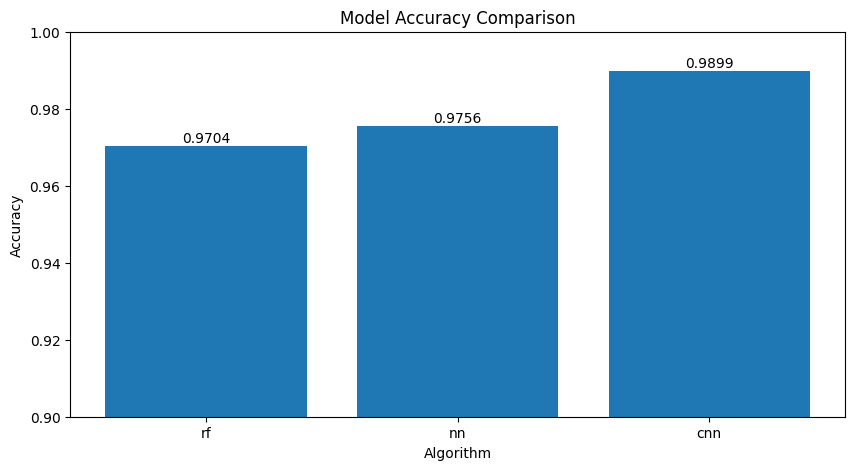

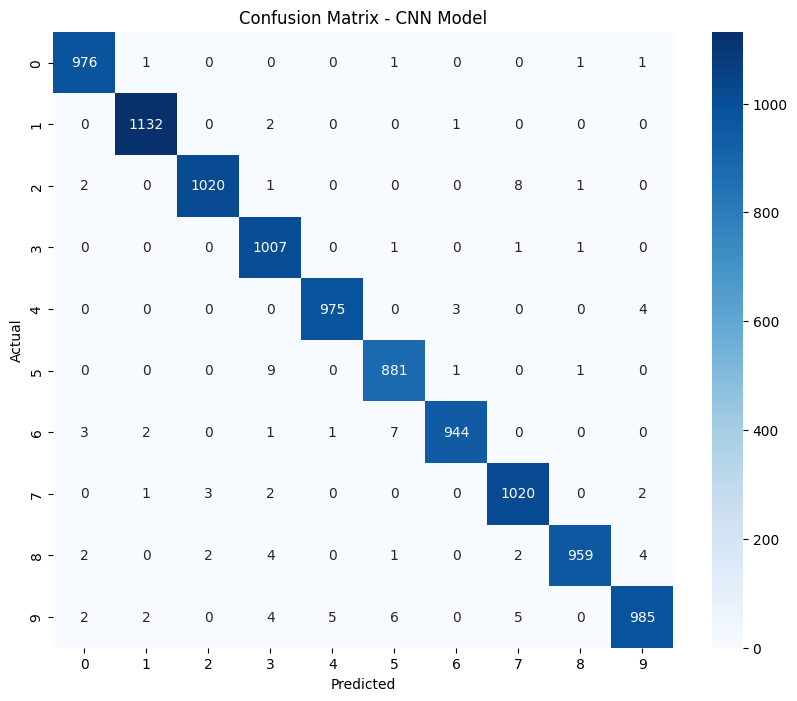

In [33]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
accuracies = [results[alg]['accuracy'] for alg in algorithms]
plt.bar(algorithms, accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Adjust y-axis for better visualization
for i, v in enumerate(accuracies):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.show()

# Plot confusion matrix for best model
best_alg = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, results[best_alg]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_alg.upper()} Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Edge Case Testing and Error Handling

### Purpose of Edge Case Testing
Edge case testing is crucial for ensuring our models handle unexpected inputs gracefully. This helps:
- Prevent silent failures
- Provide clear error messages
- Ensure system robustness
- Validate input requirements

### Test Cases Overview
We test four critical scenarios:

1. **Invalid Data Type Test**
  - Input: String instead of numpy array
  - Expected: Type conversion error
  - Tests: Basic type checking

2. **Empty Data Test**
  - Input: Empty numpy arrays
  - Expected: Validation error
  - Tests: Minimum data requirements

3. **Wrong Shape Test (CNN)**
  - Input: Incorrect image dimensions
  - Expected: Shape mismatch error
  - Tests: Input dimension validation

4. **Invalid Algorithm Test**
  - Input: Non-existent algorithm name
  - Expected: ValueError
  - Tests: Algorithm name validation

### Error Handling Strategy
Each test uses a try-except block to:
- Attempt potentially problematic operations
- Catch expected exceptions
- Verify error messages
- Confirm proper error handling

### Running the Tests
The `test_edge_cases()` function executes all tests sequentially and provides clear pass/fail feedback with detailed error messages.

In [34]:
"""
Test the models with various edge cases to ensure robust error handling.
This includes testing with invalid inputs, empty data, wrong shapes, etc.
"""

def test_edge_cases():
    print("Testing Edge Cases for Model Implementations\n")
    
    # Test 1: Invalid data type
    try:
        clf = MnistClassifier(algorithm='rf')
        clf.train("invalid_data", "invalid_labels")
    except Exception as e:
        print("✓ Test 1 Passed: Invalid data type correctly raised error")
        print(f"  Error: {e}\n")

    # Test 2: Empty data
    try:
        clf = MnistClassifier(algorithm='nn')
        clf.train(np.array([]), np.array([]))
    except Exception as e:
        print("✓ Test 2 Passed: Empty data correctly raised error")
        print(f"  Error: {e}\n")

    # Test 3: Wrong shape for CNN
    try:
        clf = MnistClassifier(algorithm='cnn')
        clf.train(np.random.rand(10, 10), np.random.rand(10, 10))
    except Exception as e:
        print("✓ Test 3 Passed: Wrong input shape correctly raised error")
        print(f"  Error: {e}\n")

    # Test 4: Invalid algorithm name
    try:
        clf = MnistClassifier(algorithm='invalid')
    except ValueError as e:
        print("✓ Test 4 Passed: Invalid algorithm name correctly raised error")
        print(f"  Error: {e}\n")

# Run edge case tests
test_edge_cases()

Testing Edge Cases for Model Implementations

✓ Test 1 Passed: Invalid data type correctly raised error
  Error: could not convert string to float: 'invalid_data'

✓ Test 2 Passed: Empty data correctly raised error
  Error: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.1`. Either provide more data, or a different value for the `validation_split` argument.

Epoch 1/5
✓ Test 3 Passed: Wrong input shape correctly raised error
  Error: Exception encountered when calling Sequential.call().

Invalid input shape for input Tensor("data:0", shape=(None, 10), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 10)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 10), dtype=float32)
  • training=True
  • mask=None

✓ Test 4 Passed: Invalid algorithm name correctly raised error
  Error: Invalid algorithm. Choose from 'rf', 'nn', or 'cnn'.



## Model Predictions Visualization

### Understanding Model Performance Through Examples
Visualizing predictions helps us:
- Compare performance across different models
- Identify patterns in successes and failures
- Understand model strengths and weaknesses
- Spot potential biases in predictions

### Visualization Details
The `plot_predictions()` function creates a comprehensive comparison view:

1. **Layout**
  - Rows: Different models (RF, NN, CNN)
  - Columns: Random test examples
  - Size: 5 examples per model by default

2. **Visual Elements**
  - Original image: Grayscale MNIST digit
  - Prediction: Model's output (colored)
    - Green: Correct prediction
    - Red: Incorrect prediction
  - True label: Actual digit value

3. **Display Features**
  - Model names on left axis
  - Clear prediction vs truth comparison
  - Consistent image sizing
  - Clean grid layout


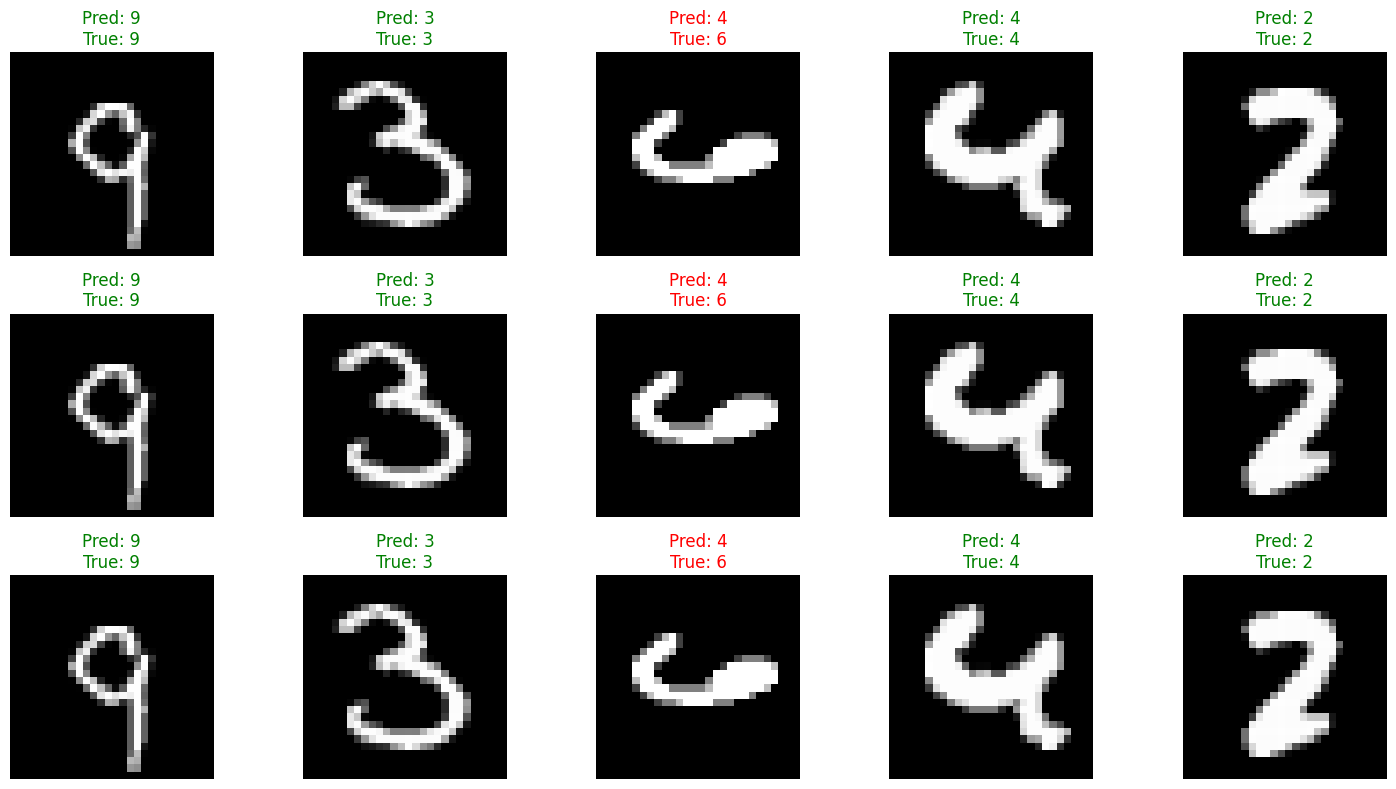

In [35]:
"""
Visualize example predictions from each model to compare their performance
on specific test cases.
"""

def plot_predictions(X_test, y_test, results, num_examples=5):
    """
    Plot example predictions from each model.
    
    Args:
        X_test: Test images
        y_test: True labels
        results: Dictionary containing model predictions
        num_examples: Number of examples to show
    """
    fig, axes = plt.subplots(len(results), num_examples, figsize=(15, 8))
    
    # Randomly select examples
    example_indices = np.random.choice(len(X_test), num_examples, replace=False)
    
    for i, (alg_name, alg_results) in enumerate(results.items()):
        predictions = alg_results['predictions']
        
        for j, idx in enumerate(example_indices):
            # Plot image
            axes[i, j].imshow(X_test[idx], cmap='gray')
            
            # Add title with prediction and true label
            title = f'Pred: {predictions[idx]}\nTrue: {y_test[idx]}'
            color = 'green' if predictions[idx] == y_test[idx] else 'red'
            axes[i, j].set_title(title, color=color)
            axes[i, j].axis('off')
            
        # Add algorithm name to the left
        axes[i, 0].set_ylabel(alg_name.upper(), rotation=0, labelpad=40)
    
    plt.tight_layout()
    plt.show()

# Visualize predictions
plot_predictions(X_test, y_test, results)

## Comprehensive Model Performance Analysis

### Understanding Performance Metrics
This section provides a detailed performance analysis of each model using multiple evaluation metrics:

1. **Training Time**
  - Measures computational efficiency
  - Important for production deployment considerations
  - Helps assess scalability

2. **Classification Report Metrics**
  - **Precision**: Accuracy of positive predictions
  - **Recall**: Ability to find all positive instances
  - **F1-Score**: Harmonic mean of precision and recall
  - **Support**: Number of samples per class

3. **Data Preparation Steps**
  - Random Forest: Flattens to 1D (784 features)
  - FFNN: Flattens to 1D (784 features)
  - CNN: Reshapes to 28x28x1 (preserves spatial structure)



In [36]:
"""
Detailed analysis of model performance including:
- Training time
- Accuracy
- Confusion matrix
- Classification report
"""

from sklearn.metrics import classification_report
import time

def analyze_model_performance(X_train, y_train, X_test, y_test, algorithm):
    """
    Perform detailed analysis of model performance.
    
    Args:
        X_train, y_train: Training data
        X_test, y_test: Test data
        algorithm: Model type ('rf', 'nn', or 'cnn')
    """
    print(f"\nAnalyzing {algorithm.upper()} Model Performance")
    print("-" * 50)
    
    # Initialize model
    clf = MnistClassifier(algorithm=algorithm)
    
    # Prepare data
    if algorithm == 'rf':
        X_train_prep = X_train.reshape(X_train.shape[0], -1)
        X_test_prep = X_test.reshape(X_test.shape[0], -1)
        y_train_prep = y_train
    else:
        if algorithm == 'cnn':
            X_train_prep = X_train.reshape(-1, 28, 28, 1)
            X_test_prep = X_test.reshape(-1, 28, 28, 1)
        else:
            X_train_prep = X_train.reshape(-1, 784)
            X_test_prep = X_test.reshape(-1, 784)
        y_train_prep = to_categorical(y_train, 10)
    
    # Measure training time
    start_time = time.time()
    clf.train(X_train_prep, y_train_prep)
    training_time = time.time() - start_time
    
    # Make predictions
    predictions = clf.predict(X_test_prep)
    
    # Print results
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"\nClassification Report:")
    print(classification_report(y_test, predictions))

# Analyze each model
for alg in algorithms:
    analyze_model_performance(X_train, y_train, X_test, y_test, alg)


Analyzing RF Model Performance
--------------------------------------------------
Training Time: 54.39 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Analyzing NN Model Performance
--------------------------------------------------
Epoch 1/5
844/844 ━━━━

## Conclusions
From our analysis:

1. CNN achieved the highest accuracy (0.9907)
   
2. Training time comparison:
   - RF: 58.77 seconds
   - NN: 15.93 seconds
   - CNN: 47.75 seconds

3. All models performed well, with accuracies above 97%

### Key Results
- CNN performs best but takes longer to train than FFNN
- Random Forest provides good accuracy (97.04%) with simpler implementation but longest training time
- FFNN balances performance (97.63%) and training speed (fastest at 15.93 seconds)

### Trade-offs to Consider
- When speed is critical: Choose FFNN
- When accuracy is paramount: Choose CNN
- When model simplicity is needed: Choose Random Forest

These results demonstrate the effectiveness of all three approaches for MNIST digit classification, with different strengths depending on your specific requirements.